## **Deep Learning**
### Travaux pratiques n°1
---



**Importation des bibliothèques**

In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score


print(tf.__version__)

2.15.0


**1/** Importer la base de données **fashion_mnist** à partir du package **datasets** de **tf.keras**, puis charger les données d'apprentissage et de test dans $4$ tableaux de type ndarray $train\_images$, $train\_labels$, $test\_images$,  et $test\_labels$  en utilisant la méthode <font color="blue">**load_data** </font>

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data, test_data = tf.keras.datasets.fashion_mnist.load_data()
train_image,train_label=train_data
test_image,test_label=test_data
print(test_image)

**2/** Afficher la taille des tableaux $train\_images$, $train\_labels$, $test\_images$, et $test\_labels$

In [ ]:
print(f"train_images shape: {train_image.shape}")
print(f"train_labels shape: {train_label.shape}")
print(f"test_images shape: {test_image.shape}")
print(f"test_labels shape: {test_label.shape}")

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


**3/** Normaliser les valeurs des pixels de chaque images dans $train\_images$ et $test\_images$ de sorte qu’on met les valeurs dans le même échelle de $0$ à $1$

In [ ]:
train_images=train_image/255.0
test_images=test_image/255.0
print(test_images)

**4/** Décomposer les données d'apprentissage en deux parties : $90\%$ sélectionnées aléatoirement sans répétions pour l’apprentissage ($train\_images$  \& $train\_labels$), et les $10\%$ restantes pour la validation ($val\_images$ \& $val\_labels$)  <font color="blue">(utiliser la fonction **train_test_split** de la bibliothèque **sklearn.model_selection**)</font>. Afficher ensuite la taille des tableaux $train\_images$ et $val\_images$

In [ ]:
from sklearn.model_selection import train_test_split

train_images,val_images,train_labels,val_labels = train_test_split(train_images,train_label,test_size=0.1, random_state=1)


**5.** Afficher les $12$ premières images de l'ensemble d'apprentissage (<u>Spécifier le nom de la classe sous chaque image</u>)

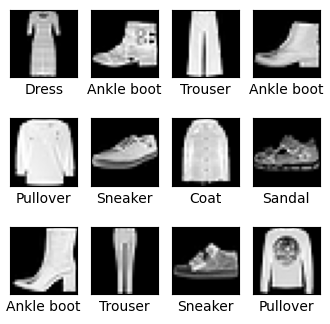

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(4,4))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])


**6/** Générer un modèle de prédiction, nommé  $cls\_fashion$ , en appliquant l'algorithme de rétropropagation de gradient sur un réseau de neurones **$5$ couches** (une couche d’entrée, $3$ couches cachées, et une couche de sortie). La couche d’entrée transforme le format des images d’un tableau à deux dimensions ($28 \times 28$ pixels) en un tableau à une dimension. Les deux premières couches cachées comportent $128$ neurones tandis que la troisième couche cachée comporte $64$ neurones <br><br>
**NB.**<br>
- Activer les neurones des couches cachées par la fonction <font color="green">**relu**</font>
- Configurer les couches de $cls\_fashion$ en utilisant la classe <font color="blue">**Sequential**</font> de <font color="blue">**tf.keras**</font>, la classe <font color="blue">**Flatten**</font> de <font color="blue">**tf.keras.layers**</font> pour configurer la couche d’entrée, et la classe <font color="blue">**Dense**</font> de <font color="blue">**tf.keras.layers**</font> pour configurer les couches cachées et de sortie)
- Appliquer l’optimiseur <font color="green">**"adam"**</font> et spécifier le nombre d’époques à $10$



In [ ]:
#construction du modèle
cls_fashion=tf.keras.Sequential([
    #couche entree
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #couche cachee
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation="relu"),
    #couche sortie
    tf.keras.layers.Dense(10,name="softmax")
    ])


In [ ]:
#Compilation du modèle
cls_fashion.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Apprentissage
history=cls_fashion.fit(train_images,train_labels,
  #nombre de pok
  epochs=10,
  validation_data=(val_images,val_labels))

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 2.3335 - accuracy: 0.1279 - val_loss: 2.3026 - val_accuracy: 0.1298
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1264 - val_loss: 2.3026 - val_accuracy: 0.1298
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1264 - val_loss: 2.3026 - val_accuracy: 0.1298
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1264 - val_loss: 2.3026 - val_accuracy: 0.1298
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1264 - val_loss: 2.3026 - val_accuracy: 0.1298
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1264 - val_loss: 2.3026 - val_accuracy: 0.1298
Epoch 7/10
1499/1688 [=========================>....] - ETA: 0s - loss: 2.3026 - accuracy: 0.1271

**7/** Afficher un résumé de l’architecture de réseau de neurones de $cls\_fashion$

> Bloc en retrait



**8/** Représenter la courbe d’évaluation de $cls\_fashion$ en fonction du nombre époques sur <u>les données d’apprentissage</u> et <u>les données de validation</u>

**9/** Représenter la <u>matrice de confusion</u> associée aux données de test selon $cls\_fashion$

In [ ]:
#pred_labels=-------
#----
#----
#cm = confusion_matrix(test_labels, pred_labels)

#sns.heatmap(cm, annot=True, fmt='d')

**10/**	Calculer l’<u>exactitude</u> (**accuracy**) et la <u>perte</u> (**loss**) associées aux données de test selon $cls\_fashion$

In [ ]:
#loss_t, acc_t = -------------

**11/**	Déduire le <u>rapport de classification</u> associée aux données de test selon $cls\_fashion$

In [ ]:
#--------------------------